In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import joblib
import os
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data =pd.read_csv("../data/loan_approval_dataset.csv")

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='str')

In [5]:
data.shape

(4269, 13)

In [6]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
data[' education']=data[' education'].replace({'Graduate':1, 'Not Graduate':0})

In [9]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
data[' education'] = data[' education'].replace({
    ' Graduate': 1,
    ' Not Graduate': 0
})


In [11]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
data[' self_employed']=data[' self_employed'].replace({' No':0,' Yes':1})

In [13]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
data[' loan_status']=data[' loan_status'].replace({' Approved':1, ' Rejected':0})

In [15]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


<Axes: >

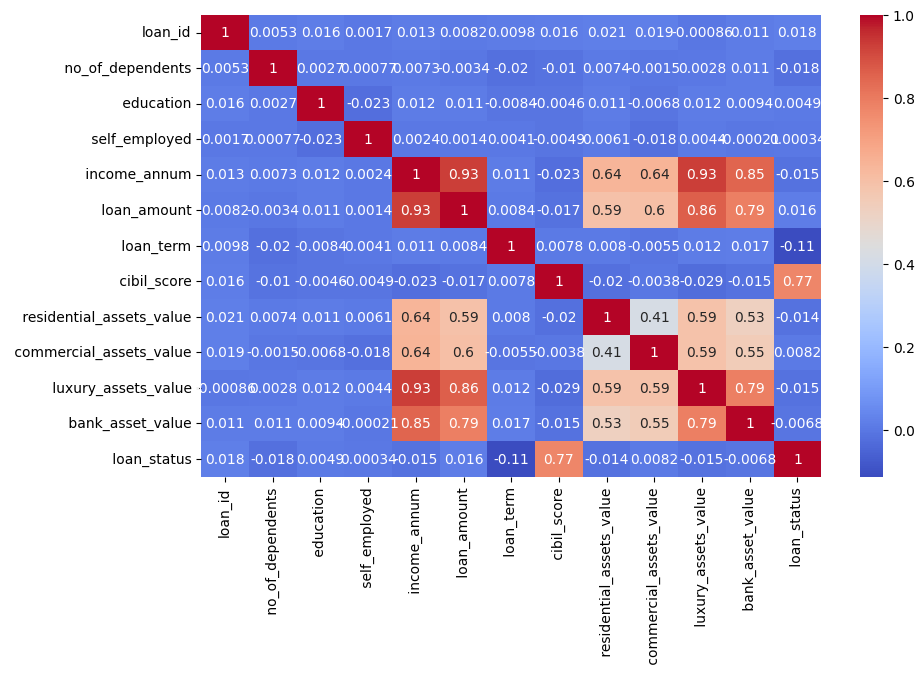

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [17]:
data=data.drop('loan_id', axis=1)

In [18]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='str')

In [19]:
drop_cols=[
    ' income_annum',
    ' loan_amount',
    ' residential_assets_value',
    ' commercial_assets_value',
    ' luxury_assets_value',
    ' bank_asset_value',
    
]

In [20]:
data.drop(drop_cols, axis=1, inplace=True)

In [21]:
data.head()

,no_of_dependents,education,self_employed,loan_term,cibil_score,loan_status
0,2,1,0,12,778,1
1,0,0,1,8,417,0
2,3,1,0,20,506,0
3,3,1,0,8,467,0
4,5,0,1,20,382,0


In [22]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' loan_term',
       ' cibil_score', ' loan_status'],
      dtype='str')

In [23]:
data.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
loan_term           0
cibil_score         0
loan_status         0
dtype: int64

In [24]:
X=data.drop(' loan_status',axis=1)
y=data[' loan_status']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

y_train = y_train.astype("float32")
y_test=y_test.astype("float32")

In [27]:
X = pd.get_dummies(X, drop_first=True)

In [28]:
print(type(X_train_scaled))
print(X_train_scaled.dtype)

<class 'numpy.ndarray'>
float32


In [29]:
print(type(y_train))
print(y_train.dtype)
print(y_train[:5])

<class 'pandas.Series'>
float32
1675    1.0
1164    1.0
192     1.0
910     1.0
567     0.0
Name:  loan_status, dtype: float32


In [30]:
X_train_t = X_train_scaled
X_test_t = X_test_scaled

y_train_t = torch.tensor(y_train.values).view(-1,1)
y_test_t=torch.tensor(y_test.values).view(-1,1)

In [31]:
print(X_train_scaled.dtype)

float32


In [32]:
class LogisticRegression(nn.Module):
    def __init__(self,n_features):
        super().__init__()
        self.linear=nn.Linear(n_features,1)

    def forward(self, X):
        return torch.sigmoid(self.linear(X))

In [33]:
n_features=X_train_t.shape[1]

model=LogisticRegression(n_features)

In [34]:
critertion=nn.BCELoss()

In [35]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [39]:
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
y_test_t  = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

In [40]:
epochs=1000

for epoch in range(epochs):

    y_pred=model(X_train_t)

    loss=critertion(y_pred,y_train_t)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if(epoch+1)%100==0:
        print(f"Epoch {epoch+1},loss:{loss.item()}:.4f")

Epoch 100,loss:0.6242026686668396:.4f
Epoch 200,loss:0.523610532283783:.4f
Epoch 300,loss:0.45885804295539856:.4f
Epoch 400,loss:0.41532671451568604:.4f
Epoch 500,loss:0.38461700081825256:.4f
Epoch 600,loss:0.3619857728481293:.4f
Epoch 700,loss:0.34468209743499756:.4f
Epoch 800,loss:0.33104369044303894:.4f
Epoch 900,loss:0.3200226128101349:.4f
Epoch 1000,loss:0.31093135476112366:.4f


In [41]:
with torch.no_grad():
    y_test_pred=model(X_test_t)
    y_test_pred_class=(y_test_pred>=0.5).float()

In [42]:
accuracy = (y_test_pred_class == y_test_t).float().mean()
print("Test Accuracy:", accuracy.item())

Test Accuracy: 0.9074941277503967


In [43]:
model.eval()


LogisticRegression(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)

In [44]:
with torch.no_grad():
    y_test_probs=model(X_test_t)

In [45]:
y_test_pred=(y_test_probs >= 0.5).float()

In [47]:
TP = ((y_test_pred == 1) & (y_test_t == 1)).sum().item()
TN = ((y_test_pred == 0) & (y_test_t == 0)).sum().item()
FP = ((y_test_pred == 1) & (y_test_t == 0)).sum().item()
FN = ((y_test_pred == 0) & (y_test_t == 1)).sum().item()

print(f"in your model, TP: {TP},TN: {TN},FP: {FP},FN: {FN}")


in your model, TP: 482,TN: 293,FP: 25,FN: 54


In [48]:
precision = TP / (TP + FP + 1e-8)
recall    = TP / (TP + FN + 1e-8)
f1        = 2 * precision * recall / (precision + recall + 1e-8)

print(precision, recall, f1)


0.9506903352869687 0.8992537313265064 0.9242569460887312


In [49]:
threshold = 0.7
y_test_pred_high = (y_test_probs >= threshold).float()

In [50]:
weights = model.linear.weight.detach().numpy()[0]
bias = model.linear.bias.item()

In [51]:
save_path="../model/loan_model.pkl"
torch.save(model.state_dict(), save_path)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
print(X_train.dtype)

float64


In [54]:
import joblib
joblib.dump(scaler, "../modelscaler.pkl")

['../modelscaler.pkl']

In [56]:
print("Weights: ",model.linear.weight)
print("Bias: ",model.linear.bias)

Weights:  Parameter containing:
tensor([[-0.0958, -0.0646,  0.0513, -0.3196,  1.6557]], requires_grad=True)
Bias:  Parameter containing:
tensor([0.5584], requires_grad=True)
